In [ ]:
# Exploratory Data Analysis : Process of examining dataset to understand the main characteristics, Visual methods can be used. Helps understanding the data's structure, detect patterns, spot anomalies 

In [273]:
import pandas as pd
 #refers pandas as pd for convenience 
import matplotlib.pyplot as plt #library for data visualization
import seaborn as sns #another visualization library built on top of matplotlib
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

#Load the dataset

df = pandas.read_csv('DB_Voice_Features.csv') 

In [275]:
print(df.head()) #inspects the first few rows

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [92]:
print(df.info()) #summary of the DataFrame, 195 non-null values(no missing values),mostly float, one integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [94]:
print(df.describe()) #description about statistical information of the DataFrame such as count,average,standard deviation,min and max values

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

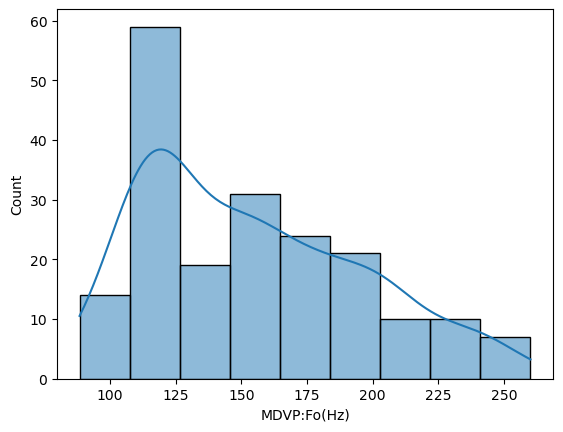

In [97]:
#histplot() function creates a histogram for MDVP:Fo(Hz) column (couldn't use distplot() gives an error telling that its an old version)
#KDE stands for Kernel Density Estimate. Statistical method to estimate probality density function

sns.histplot(df['MDVP:Fo(Hz)'], kde = True)
plt.show()


# KDE Line is the smooth curve showing the overall distrbution
# On the graph we see that most of MDVP:Fo(Hz) values are clustured around 125






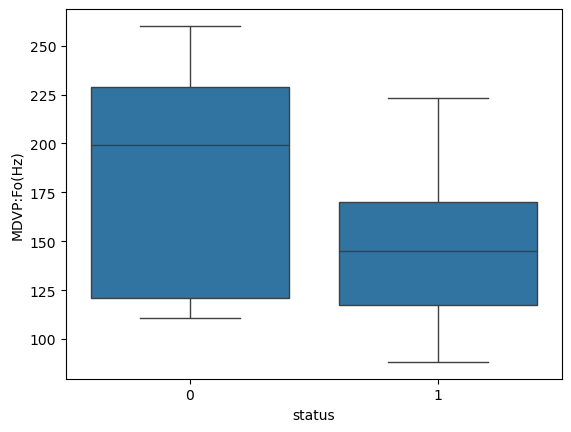

In [100]:
#boxplot() function to visualize summary of the statistics
#"x = status" we seperate the data into 2 categories 0 = healthy 1 = patients with Parkinson's 
#boxes below represents the middle of all the data
#lines inside the boxes are the median frequency
#whiskers are the range lowest point and the highest point

sns.boxplot(x = 'status', y = 'MDVP:Fo(Hz)', data = df)
plt.show()

pairplot() function uses a type of graph called scatter plot to visualize the relationship between 2 numerical variables
this snippet creates 6 columns at a time like code from 'Example_EDA'. This is a better approach for Example_EDA cause we have too many variables and it would take too much time to plot all features




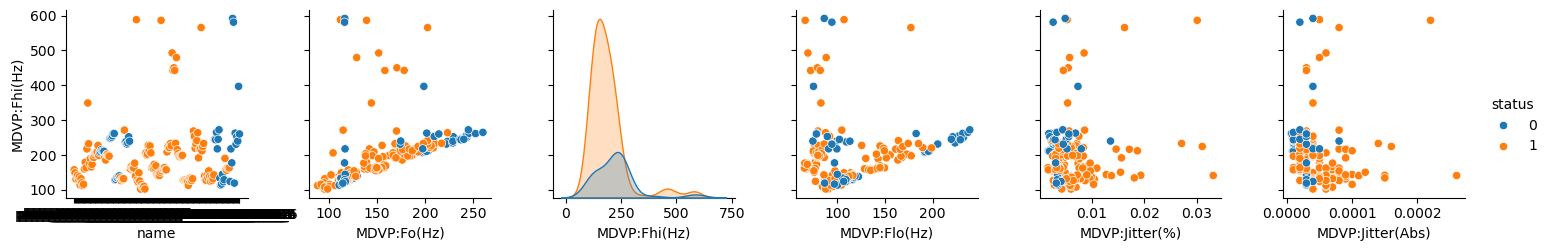

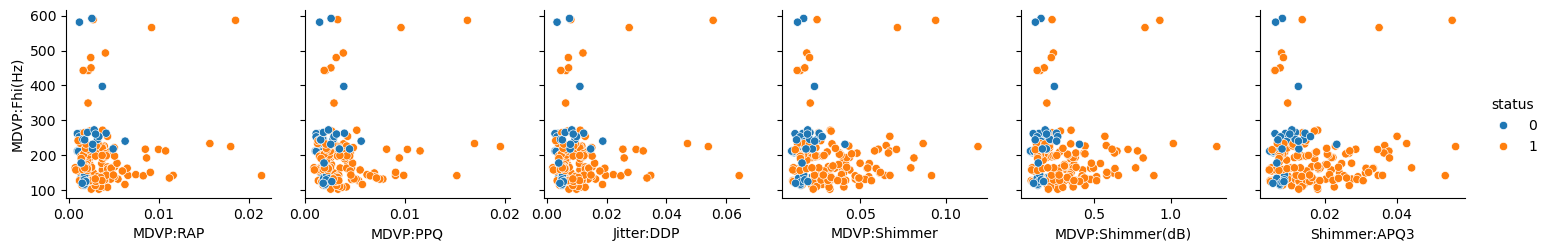

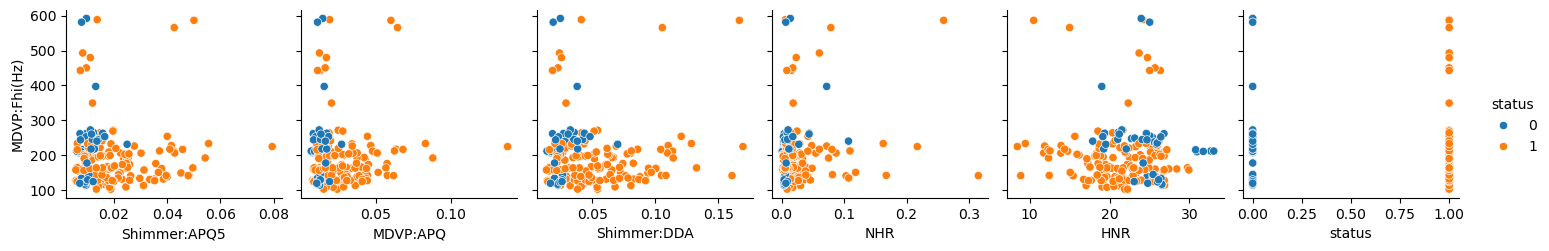

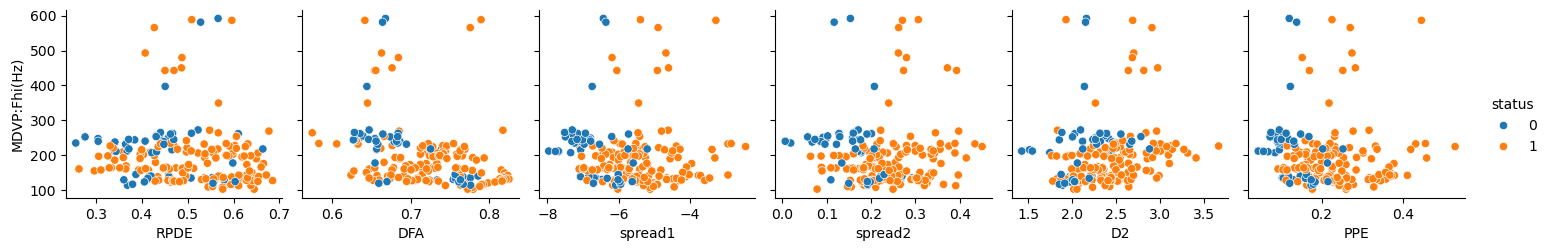

In [163]:

for i in range(0, len(df.columns), 6):
    sns.pairplot(df, hue = 'status',
                x_vars=df.columns[i:i+6],
                y_vars=['MDVP:Fhi(Hz)'])

For this part of the homework we have less record so in the next line of code snippet I will pairplot all the data

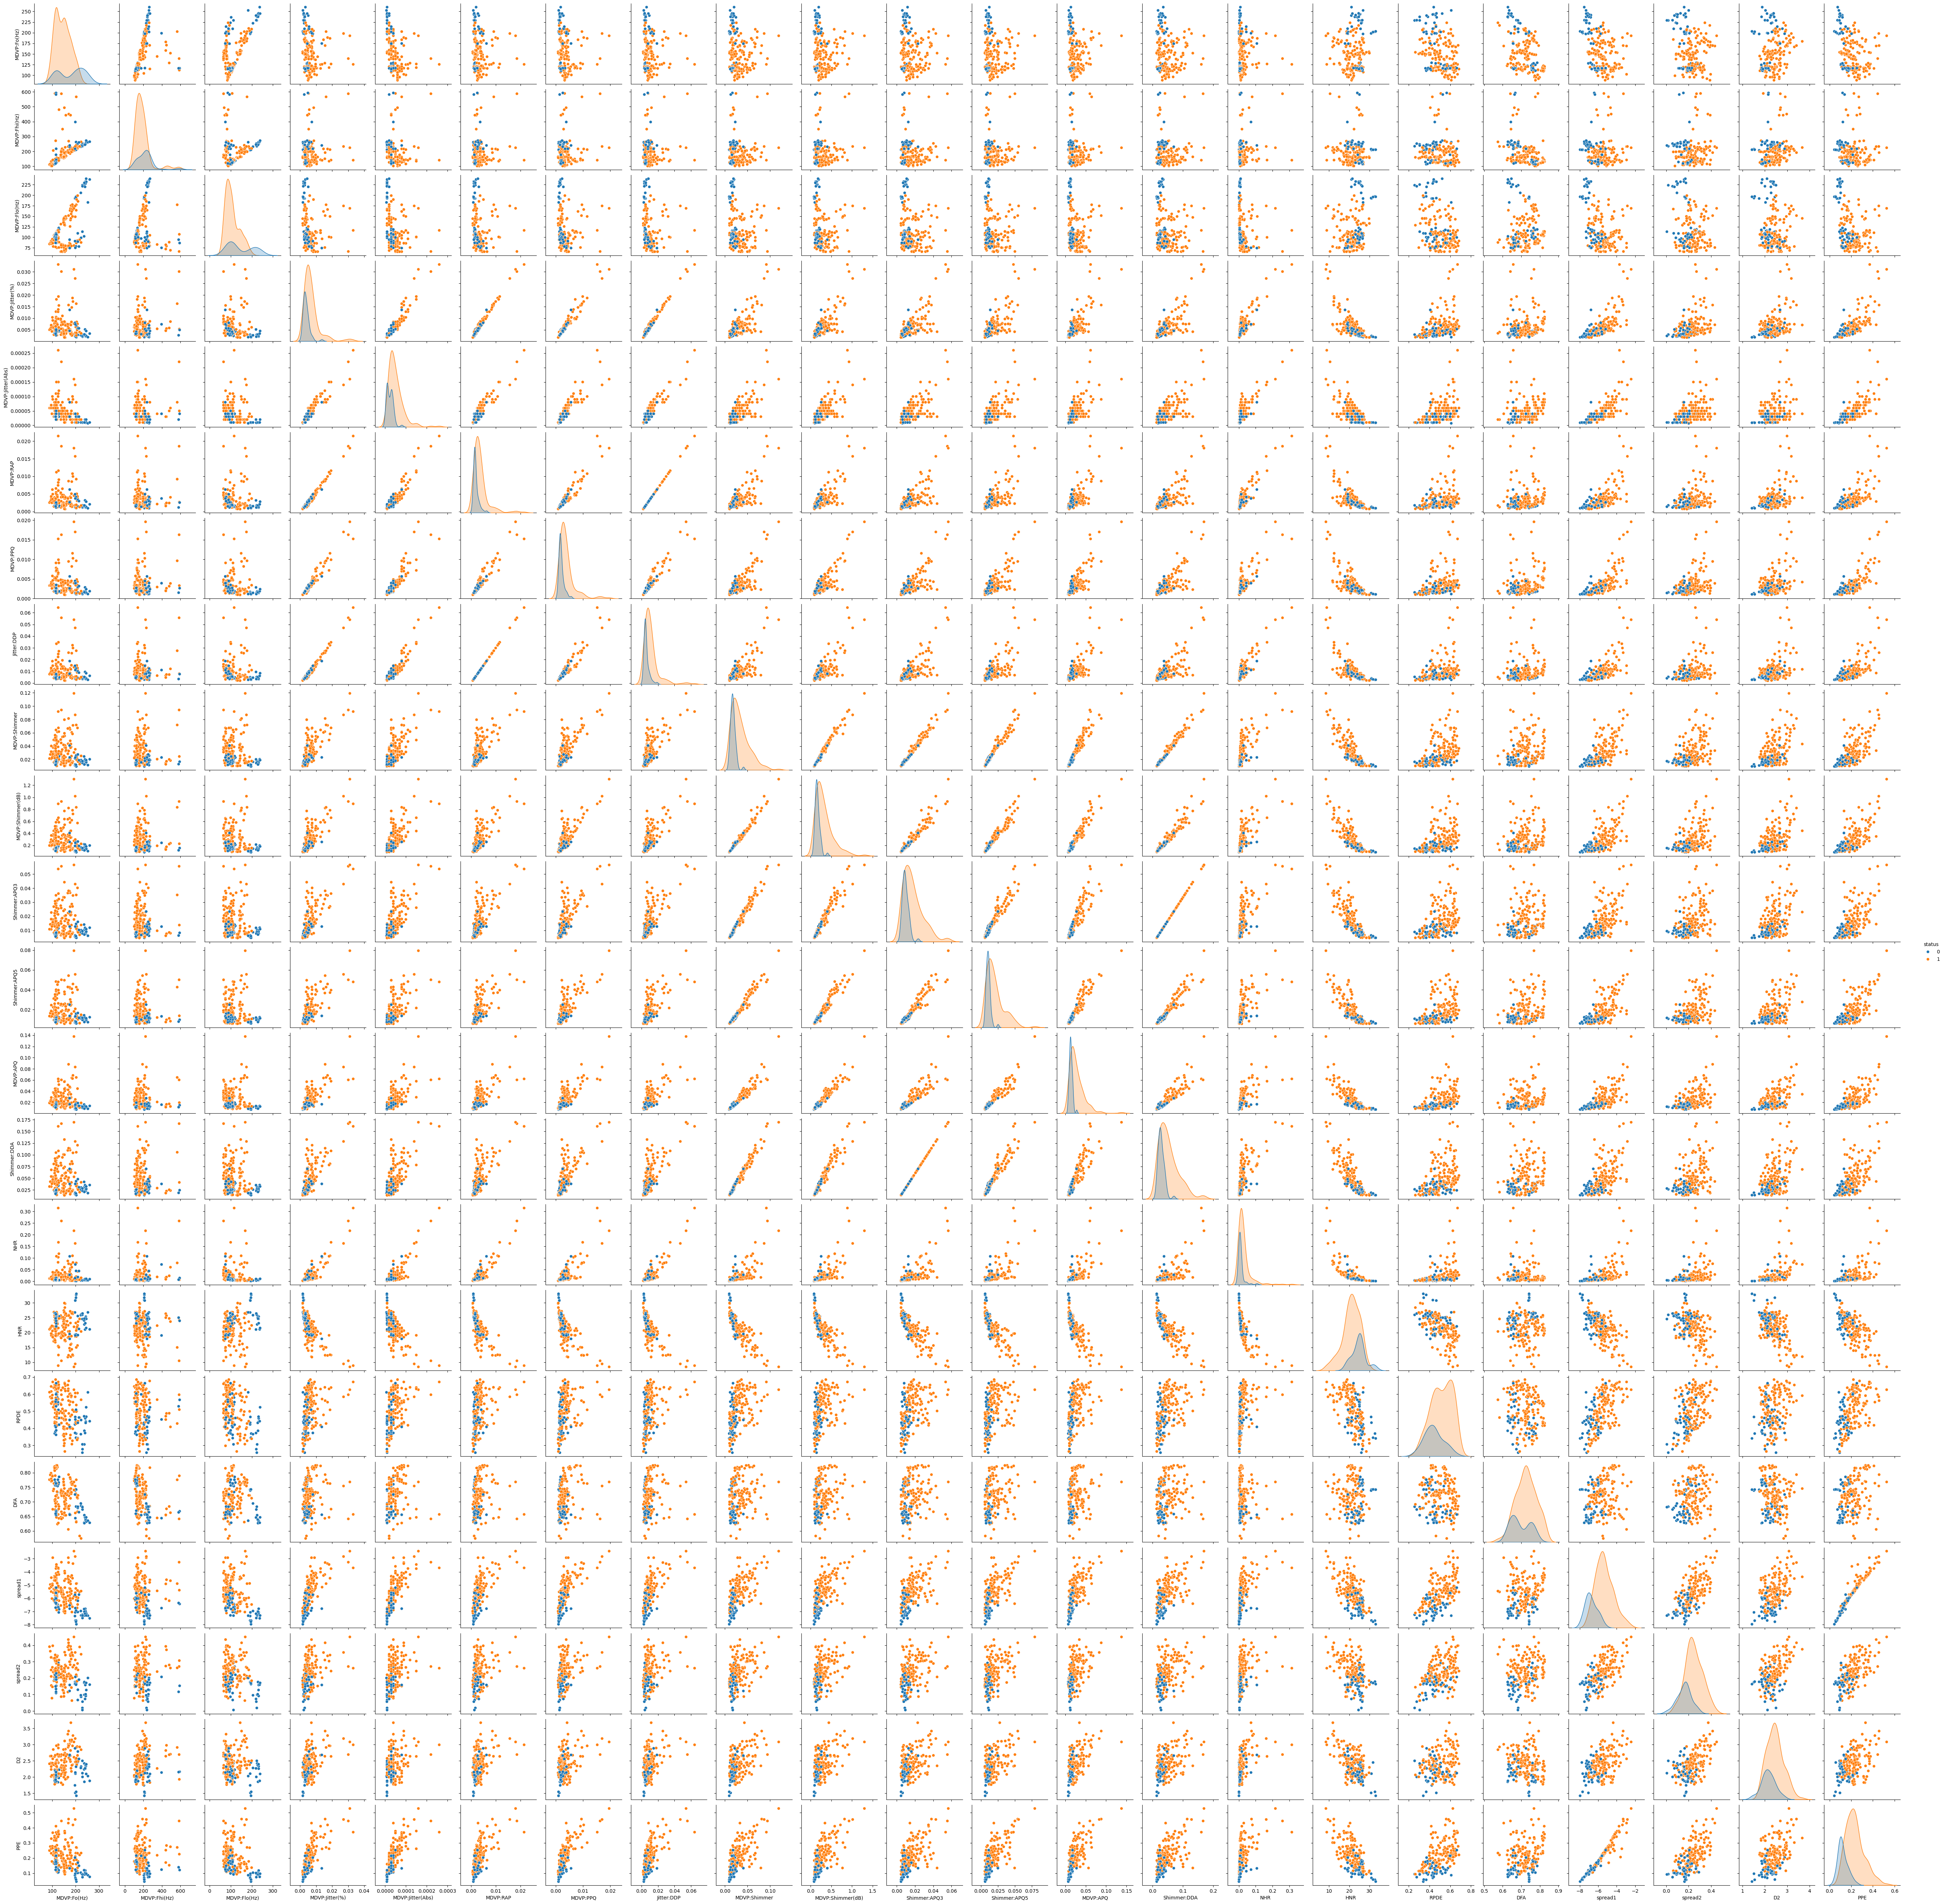

In [165]:
sns.pairplot(df, hue = 'status')
plt.show()

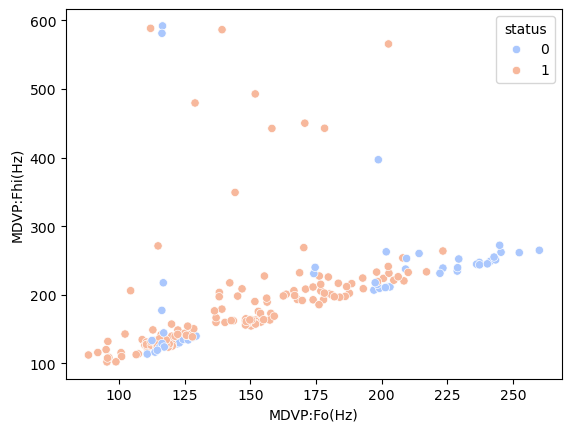

In [161]:
# Manually checked which color represents which status
sns.scatterplot(x=df['MDVP:Fo(Hz)'], y=df['MDVP:Fhi(Hz)'], hue=df['status'], palette='coolwarm')
plt.show()

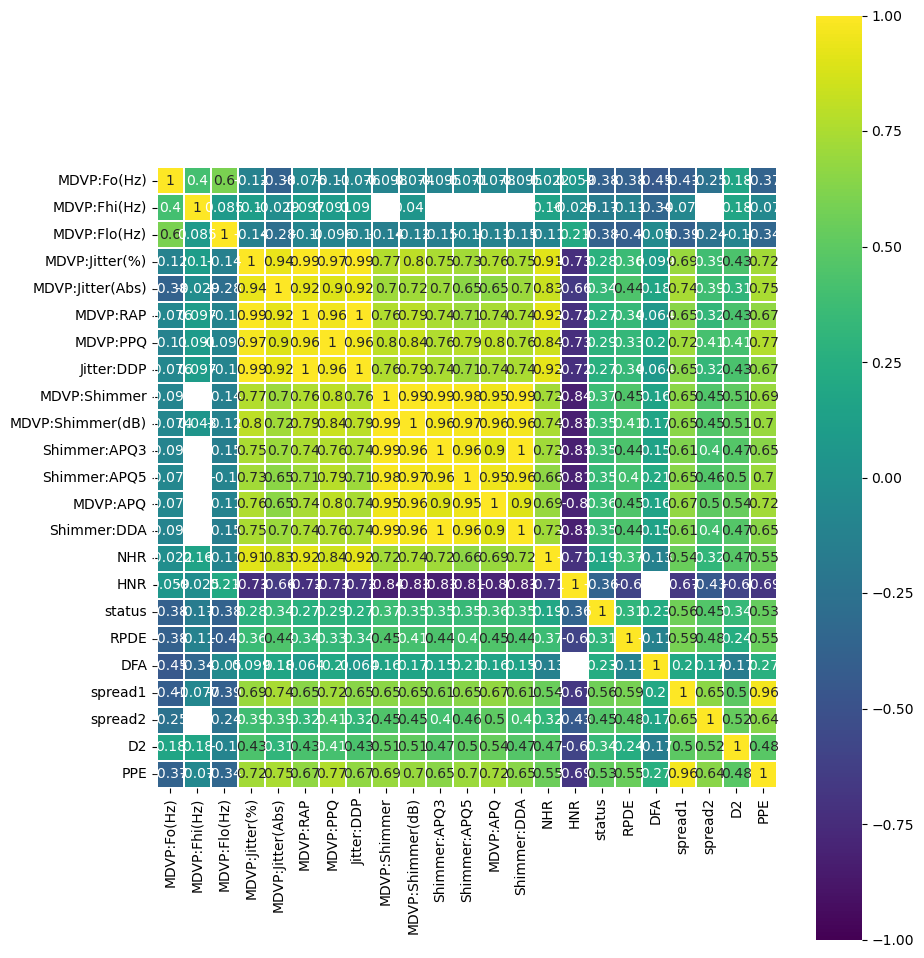

In [206]:
df_num = df.select_dtypes(include = [float, int]) #df.corr() only works with numerical data, got an error (ValueError: could not convert string to float: 'phon_R01_S01_1') to fix that we only select numeric columns  
                         

corr = df_num.corr()


plt.figure(figsize=(10, 12))

sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);



We have a lot of variables in the heatmap, it's overwhelming to look and interpret. To make it easier to interpret, we can set a higher threshold 

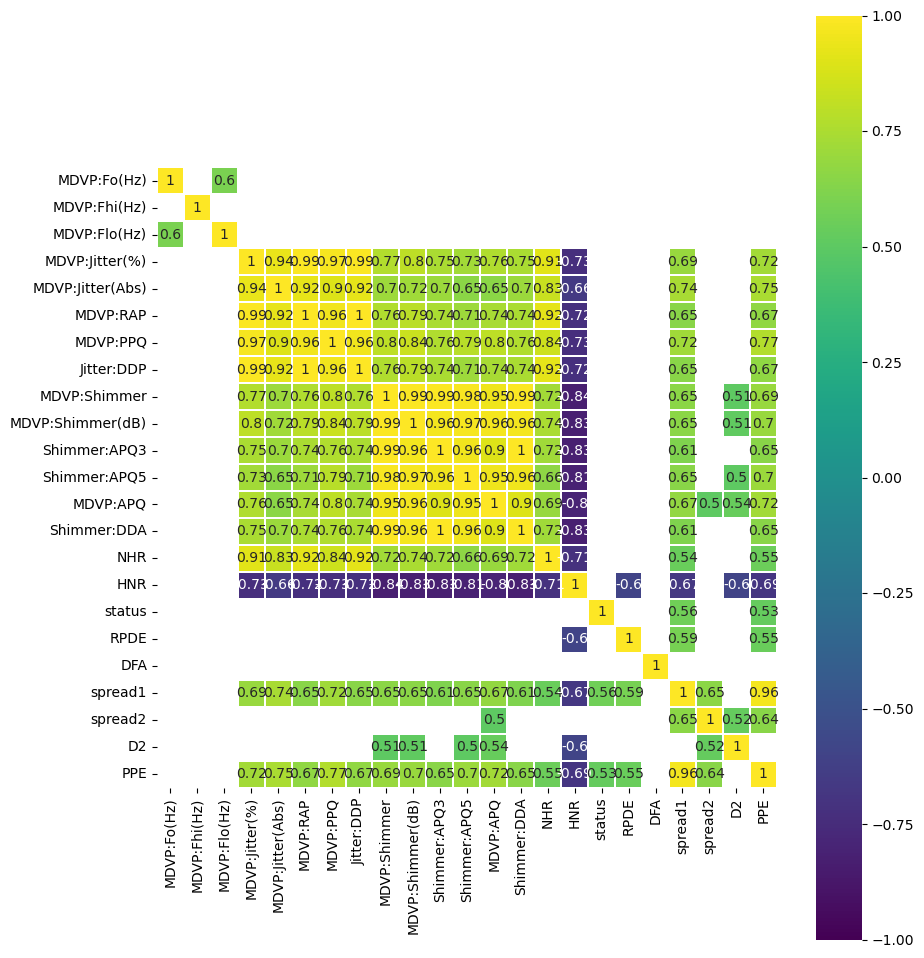

In [210]:
df_num = df.select_dtypes(include = [float, int]) #df.corr() only works with numerical data, got an error (ValueError: could not convert string to float: 'phon_R01_S01_1') to fix that we only select numeric columns  
                         

corr = df_num.corr()


plt.figure(figsize=(10, 12))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 10}, square=True);




In [342]:
print(df['status'].value_counts())


status
1    147
0     48
Name: count, dtype: int64


We performed EDA and visualized the correlations. Now we will create models to estimate their accuracy on unseen data.

In [345]:
# Split-out validation dataset


X = df.select_dtypes(include=[float,int]).values #select all columns with numeric data types so we won't get an error for string
Y = df['status'].values

validation_size = 0.20 #20% of the data will be used for validation
seed = 7 #random seed for reproducibility, ensures data splits consistently
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [348]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [350]:
# Spot Check Algorithms
models = []
# a list of machine learning models 
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 1.000000 (0.000000)
LDA: 0.897917 (0.070815)
KNN: 0.847083 (0.063984)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 0.788333 (0.091283)


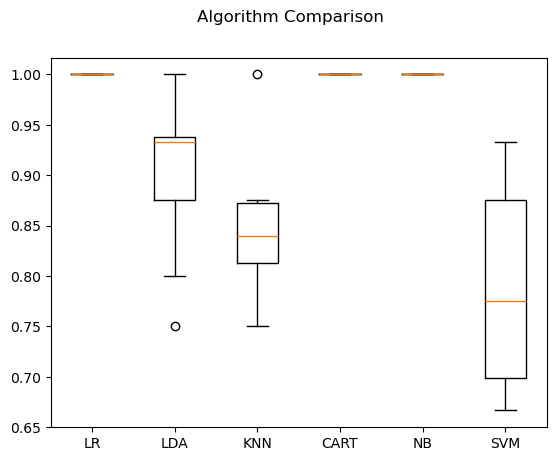

In [352]:
# Compare Algorithms, visualizes the performance of the algorithms 
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [354]:
# Make predictions on validation dataset
knn = KNeighborsClassifier() #trains KNN classifier
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation) #makes predictions on the validation set

#evaluates model's performance 
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8461538461538461
[[ 2  5]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39

